In [2]:
from tslearn.generators import random_walks
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/tslearn/clustering/kmeans.py:17: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  "Scikit-learn <0.24 will be deprecated in a "


(40, 32, 1)


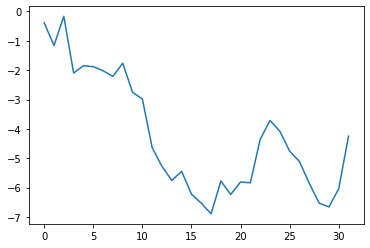

(40, 32, 1)
[[ 1.92831696]
 [ 1.5380513 ]
 [ 2.03896752]
 [ 1.06642299]
 [ 1.19145222]
 [ 1.17573351]
 [ 1.10556782]
 [ 1.00965381]
 [ 1.23535156]
 [ 0.73608622]
 [ 0.62242192]
 [-0.20994916]
 [-0.53177681]
 [-0.77296032]
 [-0.61632152]
 [-1.00671703]
 [-1.16134419]
 [-1.34573275]
 [-0.78243508]
 [-1.01280382]
 [-0.79879958]
 [-0.81287115]
 [-0.07033944]
 [ 0.25503863]
 [ 0.07175161]
 [-0.26972346]
 [-0.44762434]
 [-0.82027493]
 [-1.15986068]
 [-1.22666095]
 [-0.91485532]
 [-0.01376553]]


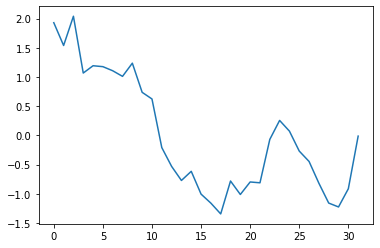

In [60]:
X = random_walks(n_ts=40, sz=32, d=1)
print(X.shape)
# print(X[0])
plt.plot(X[0].reshape(1, -1)[0])
plt.show()
X = TimeSeriesScalerMeanVariance().fit_transform(X)
print(X.shape)
print(X[0])
plt.plot(X[0].reshape(1, -1)[0])
plt.show()

In [18]:
import matplotlib.pyplot as plt
import numpy as np

In [61]:
X_ = np.reshape(X, (40, -1))
print(X_.shape)
print(X_)

(40, 32)
[[ 1.92831696  1.5380513   2.03896752 ... -1.22666095 -0.91485532
  -0.01376553]
 [ 0.09688615 -0.55362622 -0.49306407 ...  1.94043465  2.16902021
   2.16968398]
 [-1.31520342 -0.08146626 -0.2403118  ...  0.05776475  0.29525349
   0.56418592]
 ...
 [-0.06974539 -0.84194887  0.02694396 ...  1.33949827  1.80730604
   1.34560062]
 [-0.37799931  0.24888976  1.59577752 ...  0.76813823 -0.38095982
   0.56759008]
 [ 1.3121691   1.40732745  1.59580623 ... -1.77203591 -1.77692002
  -2.08562655]]


<function matplotlib.pyplot.show>

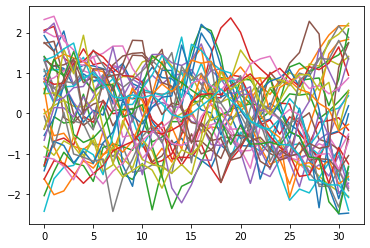

In [62]:
for data in X_:
  plt.plot(data)
plt.show

In [63]:
 km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5,random_state=0).fit(X)
km.cluster_centers_.shape

(3, 32, 1)

In [72]:
km = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5,max_iter_barycenter=5,random_state=0).fit(X)

In [90]:
km = TimeSeriesKMeans(n_clusters=3, metric="softdtw", max_iter=5,max_iter_barycenter=5,metric_params={"gamma": .5},random_state=0).fit(X)

In [91]:
print(km.labels_)

[0 2 1 1 0 0 0 2 0 0 0 1 1 0 2 0 0 0 1 0 1 0 2 0 1 0 0 0 2 1 1 1 0 1 2 2 1
 1 2 0]


In [92]:
import pandas as pd

In [93]:
df = pd.DataFrame(X_)
print(df)

          0         1         2   ...        29        30        31
0   1.928317  1.538051  2.038968  ... -1.226661 -0.914855 -0.013766
1   0.096886 -0.553626 -0.493064  ...  1.940435  2.169020  2.169684
2  -1.315203 -0.081466 -0.240312  ...  0.057765  0.295253  0.564186
3  -1.281114 -0.691422 -0.612708  ... -0.535555 -0.455765 -0.648244
4   1.393894  0.463243  0.727416  ... -1.553171 -1.041091 -1.854675
5   1.754337  1.535408 -0.104789  ... -0.631256 -1.624351 -0.570369
6   2.036673  1.900038  1.926748  ... -0.573066 -0.959144 -0.513961
7   1.300964  0.633135  0.335222  ...  1.735576  2.166375  1.877341
8  -0.007959  0.194159  0.320755  ... -1.770845 -1.942069 -2.056611
9   1.041906  1.085201  1.074175  ... -0.677063 -1.555937 -2.401526
10  0.917256  1.180053  1.114566  ... -1.832904 -2.492378 -2.471975
11  0.613892 -0.828001 -1.326510  ...  1.473597  1.775937  1.833913
12 -2.039223 -1.444046 -0.964333  ...  1.319144  1.449875  1.751407
13  2.058644  2.154759  1.375178  ... -0.178976 

In [94]:
df['cluster'] = km.labels_
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,cluster
0,1.928317,1.538051,2.038968,1.066423,1.191452,1.175734,1.105568,1.009654,1.235352,0.736086,0.622422,-0.209949,-0.531777,-0.772960,-0.616322,-1.006717,-1.161344,-1.345733,-0.782435,-1.012804,-0.798800,-0.812871,-0.070339,0.255039,0.071752,-0.269723,-0.447624,-0.820275,-1.159861,-1.226661,-0.914855,-0.013766,0
1,0.096886,-0.553626,-0.493064,-0.816869,-0.894682,-0.710563,-1.026582,-0.882898,-1.256431,-0.872729,-0.743963,-1.215500,-0.866716,-1.207786,-0.512784,0.062274,-0.482638,-0.340463,-0.367060,-0.139315,0.038667,0.347745,0.689845,0.469012,0.822436,0.726459,1.093468,1.171606,1.586129,1.940435,2.169020,2.169684,2
2,-1.315203,-0.081466,-0.240312,-0.205162,0.474051,-0.367368,0.184613,-0.797235,-1.502409,-1.640206,-1.241848,-2.390364,-1.386037,-0.158111,0.692789,1.549830,2.154842,2.050207,1.414977,0.103235,0.162359,0.238037,-0.147961,0.048902,0.195351,0.482097,0.451953,0.484832,-0.131598,0.057765,0.295253,0.564186,1
3,-1.281114,-0.691422,-0.612708,-0.784479,-0.074216,-0.222813,0.325706,-0.008241,0.025516,-0.501414,-0.771236,-1.252917,-1.172251,-1.003323,-0.514650,0.254018,0.545519,1.477843,2.116212,2.365627,2.007541,1.345914,1.108511,0.889001,0.253929,0.231700,-0.507552,-0.765159,-1.143976,-0.535555,-0.455765,-0.648244,1
4,1.393894,0.463243,0.727416,0.268813,-0.046530,0.406167,0.949537,0.232551,0.404720,0.846615,0.690764,0.947226,0.724250,0.935652,0.979606,1.085756,0.714671,1.062828,1.101097,0.498317,-0.272683,-0.734160,-1.448957,-1.566042,-1.140912,-1.039513,-1.020485,-1.439230,-1.275672,-1.553171,-1.041091,-1.854675,0
5,1.754337,1.535408,-0.104789,-0.240466,0.049596,0.228254,0.305102,-0.308261,0.056072,0.122699,-0.614876,-1.206403,-1.053297,-0.666262,-1.183376,-0.507806,-1.005245,-0.906669,-0.591033,-0.600534,-0.860977,-0.255085,0.130859,1.016081,0.733281,1.244677,1.506331,2.280887,1.967470,-0.631256,-1.624351,-0.570369,0
6,2.036673,1.900038,1.926748,1.194844,1.056083,0.960961,0.593595,1.196967,1.107266,0.702174,0.438054,0.245618,0.385592,0.051703,-0.198728,-1.001240,-0.413884,-0.320427,-0.819082,-0.326133,-0.889717,-1.359764,-0.340903,-0.584718,-1.162216,-0.640354,-1.255063,-1.486552,-0.951365,-0.573066,-0.959144,-0.513961,0
7,1.300964,0.633135,0.335222,-0.188825,-0.257805,-0.778354,-0.764787,-1.069517,-0.808577,-1.458680,-1.415330,-1.278512,-1.306172,-1.490834,-0.330319,-0.008995,-0.441083,-0.088672,-0.194240,-0.559306,-0.522567,-0.183755,0.197432,0.154440,0.806641,0.686202,0.996607,0.919034,1.337361,1.735576,2.166375,1.877341,2
8,-0.007959,0.194159,0.320755,0.175762,0.160329,0.329616,0.648404,0.729485,0.914369,0.896867,1.272000,1.360590,1.479583,1.165171,0.974264,0.929923,0.459853,0.311872,0.276771,0.388161,0.272917,-0.094460,-0.679076,-0.833707,-0.660616,-1.064755,-1.279560,-1.314971,-1.556224,-1.770845,-1.942069,-2.056611,0
9,1.041906,1.085201,1.074175,1.133622,1.388009,0.770117,0.943179,0.939751,0.355783,-0.122087,-0.834107,-0.378456,-0.249192,0.989483,1.888863,0.640452,1.238309,0.622006,-0.450771,-1.105748,-0.464805,-0.773062,-0.940358,-0.607360,-0.158578,-0.789011,-0.756640,-0.818607,-1.027550,-0.677063,-1.555937,-2.401526,0


In [95]:
df_0 = df[df['cluster'] == 0].drop('cluster', axis=1)
df_0.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1.928317,1.538051,2.038968,1.066423,1.191452,1.175734,1.105568,1.009654,1.235352,0.736086,0.622422,-0.209949,-0.531777,-0.772960,-0.616322,-1.006717,-1.161344,-1.345733,-0.782435,-1.012804,-0.798800,-0.812871,-0.070339,0.255039,0.071752,-0.269723,-0.447624,-0.820275,-1.159861,-1.226661,-0.914855,-0.013766
4,1.393894,0.463243,0.727416,0.268813,-0.046530,0.406167,0.949537,0.232551,0.404720,0.846615,0.690764,0.947226,0.724250,0.935652,0.979606,1.085756,0.714671,1.062828,1.101097,0.498317,-0.272683,-0.734160,-1.448957,-1.566042,-1.140912,-1.039513,-1.020485,-1.439230,-1.275672,-1.553171,-1.041091,-1.854675
5,1.754337,1.535408,-0.104789,-0.240466,0.049596,0.228254,0.305102,-0.308261,0.056072,0.122699,-0.614876,-1.206403,-1.053297,-0.666262,-1.183376,-0.507806,-1.005245,-0.906669,-0.591033,-0.600534,-0.860977,-0.255085,0.130859,1.016081,0.733281,1.244677,1.506331,2.280887,1.967470,-0.631256,-1.624351,-0.570369
6,2.036673,1.900038,1.926748,1.194844,1.056083,0.960961,0.593595,1.196967,1.107266,0.702174,0.438054,0.245618,0.385592,0.051703,-0.198728,-1.001240,-0.413884,-0.320427,-0.819082,-0.326133,-0.889717,-1.359764,-0.340903,-0.584718,-1.162216,-0.640354,-1.255063,-1.486552,-0.951365,-0.573066,-0.959144,-0.513961
8,-0.007959,0.194159,0.320755,0.175762,0.160329,0.329616,0.648404,0.729485,0.914369,0.896867,1.272000,1.360590,1.479583,1.165171,0.974264,0.929923,0.459853,0.311872,0.276771,0.388161,0.272917,-0.094460,-0.679076,-0.833707,-0.660616,-1.064755,-1.279560,-1.314971,-1.556224,-1.770845,-1.942069,-2.056611
9,1.041906,1.085201,1.074175,1.133622,1.388009,0.770117,0.943179,0.939751,0.355783,-0.122087,-0.834107,-0.378456,-0.249192,0.989483,1.888863,0.640452,1.238309,0.622006,-0.450771,-1.105748,-0.464805,-0.773062,-0.940358,-0.607360,-0.158578,-0.789011,-0.756640,-0.818607,-1.027550,-0.677063,-1.555937,-2.401526
10,0.917256,1.180053,1.114566,0.690787,0.977954,0.812412,0.817316,0.278972,0.333257,0.512554,0.790893,1.140624,0.885623,0.856994,0.592269,0.434485,0.088298,0.010825,-0.528785,-0.049375,-0.627570,-0.507182,-0.211636,-0.142934,0.263007,-0.463990,-0.576259,-1.151635,-1.641522,-1.832904,-2.492378,-2.471975
13,2.058644,2.154759,1.375178,1.187246,1.598779,1.206270,1.259153,1.043777,0.424657,0.360586,0.390938,-0.156148,-0.397255,-1.129626,-1.086585,-1.101453,-0.756340,-1.350093,-1.714208,-1.150098,-0.859777,-0.392574,-0.299175,-0.161565,-0.515985,-0.088857,-0.225927,-0.748348,-0.221419,-0.178976,-0.108588,-0.416992
15,1.734405,1.786139,0.889581,-0.010179,-0.294952,-0.121808,0.744234,1.197281,1.419893,1.485243,1.504862,1.240319,1.585566,0.218553,-0.417548,-0.694863,-0.686692,-0.903160,-1.118171,-0.536861,-0.554613,-0.581036,-0.734561,-0.995913,-1.098503,-0.990328,-0.166428,0.013390,-0.644310,-0.727019,-0.894928,-1.647593
16,0.784111,0.881637,1.053574,1.246373,1.189593,1.398723,1.487819,1.664519,1.668883,1.112948,0.753225,0.424064,0.417023,-0.000736,-0.281176,-0.052274,-0.302459,-0.286518,-0.186673,-0.471011,-0.936683,-0.918869,-0.736510,-0.715557,-1.138133,-1.100446,-1.174903,-0.955510,-0.753037,-0.855615,-1.403169,-1.813215


In [96]:
df_1 = df[df['cluster'] == 1].drop('cluster', axis=1)
df_2 = df[df['cluster'] == 2].drop('cluster', axis=1)

In [97]:
np1 = df_1.values
np2 = df_2.values
np0 = df_0.values

In [98]:
centers = km.cluster_centers_.reshape(3, -1)
print(centers)

[[ 1.34399069  1.01408804  0.73821325  0.85095195  1.00613345  1.10372204
   1.13911766  1.09248742  0.94256265  0.7115261   0.51633943  0.46396003
   0.49501112  0.3668382   0.10748641 -0.18605765 -0.42613498 -0.59370216
  -0.69643661 -0.75010184 -0.73828785 -0.63850389 -0.43259393  0.19944354
  -0.47082931 -0.64676789 -0.82300875 -1.00184683 -1.1676213  -1.30817432
  -1.42575695 -1.46348531]
 [-1.18424576 -1.08250688 -0.93140393 -0.73827984 -0.29787625 -1.01515791
  -1.17841543 -1.23971589 -1.13718361 -0.87503131 -0.59988621 -0.34988246
  -0.12928679  0.08487504  0.34206982  0.59364388  0.77198469  0.91946956
   1.09538411  1.35882286  1.28878771  1.09825997  0.87537993  0.65842435
   0.50190959  0.4250352   0.40804718  0.3909732   0.30731212  0.06832553
  -0.64304373  0.94550282]
 [ 0.78870968  0.73188171  0.76896665  0.85378555  0.9919036   0.38124234
   0.03731753 -0.22253674 -0.37058844 -0.51245918 -0.72797669 -0.86695298
  -0.92612712 -0.99596649 -1.16676934 -1.37955343 -1.42648

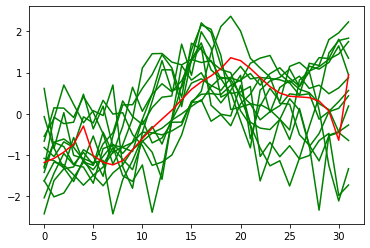

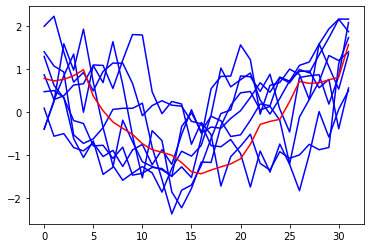

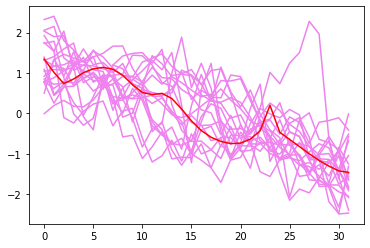

In [99]:
for data in np1:
  plt.plot(data, 'g')
plt.plot(centers[1], 'r')
plt.show()

for data in np2:
  plt.plot(data, 'b')
plt.plot(centers[2], 'r')
plt.show()

for data in np0:
  plt.plot(data, color='violet')
plt.plot(centers[0], 'r')
plt.show()

(69, 275, 1)


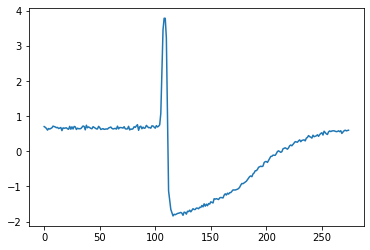

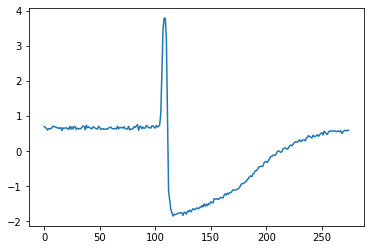

(50, 275, 1)


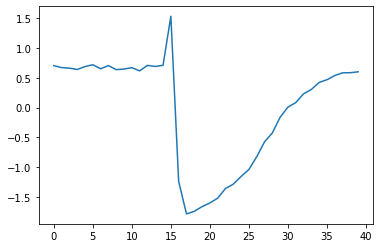

(50, 40, 1)


In [48]:
import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler

seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes
print(X_train.shape)
numpy.random.shuffle(X_train)
# print("###")
# print(X_train.shape)
# print(X_train[0])
X1 = X_train[0].reshape(1, -1)
plt.plot(X1[0])
plt.show()
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])
X2 = X_train[0].reshape(1, -1)
plt.plot(X2[0])
plt.show()
print(X_train.shape)
# Make time series shorter
X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
X3 = X_train[0].reshape(1, -1)
plt.plot(X3[0])
plt.show()
print(X_train.shape)
#sz = X_train.shape[1]

Euclidean k-means
16.434 --> 9.437 --> 9.437 --> 
DBA k-means
Init 1
0.637 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


0.458 --> 0.458 --> 
Init 2
0.826 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

0.525 --> 0.477 --> 0.472 --> 0.472 --> 

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished



Soft-DTW k-means
0.472 --> 0.144 --> 0.142 --> 0.143 --> 0.142 --> 0.143 --> 0.142 --> 0.143 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 


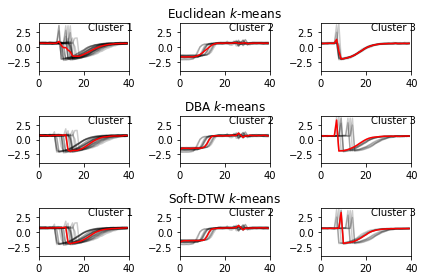

In [17]:
# License: BSD 3 clause

import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler

seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes
numpy.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])
# Make time series shorter
X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]

# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure()
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred = dba_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 4 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=3,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 7 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()